In [ ]:
!pip install -q transformers

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

# download model
model_id = "tiiuae/falcon-7b-instruct"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
	model_id,
	trust_remote_code=True,
	torch_dtype=torch.bfloat16
)



In [ ]:
# generate answer
prompt = "Translate English to French: Configuration files are easy to use!"
inputs = tokenizer(prompt, return_tensors="pt", return_token_type_ids=False)
outputs = model.generate(**inputs, max_new_tokens=100)

# print answer
print(tokenizer.batch_decode(outputs, skip_special_tokens=True)[0])

# Encoder-Decoder

In [ ]:
!pip install -q accelerate
!pip install -q bitsandbytes
!pip install  -q --upgrade transformers accelerate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 26.0 MB/s eta 0:00:00


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

OPT = AutoModelForCausalLM.from_pretrained("facebook/opt-1.3b", load_in_8bit=True)
tokenizer = AutoTokenizer.from_pretrained("facebook/opt-1.3b")

inp = "The quick brown fox jumps over the lazy dog"  ## total 9 words
inp_tokenized = tokenizer(inp, return_tensors="pt")

print(inp_tokenized)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/653 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.
`low_cpu_mem_usage` was None, now set to True since model is quantized.


pytorch_model.bin:   0%|          | 0.00/2.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/441 [00:00<?, ?B/s]

{'input_ids': tensor([[    2,   133,  2119,  6219, 23602, 13855,    81,     5, 22414,  2335]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


# Input Embedding

The initial procedure involves translating the input tokens into embeddings. These embeddings are acquired vectors symbolizing the input tokens, facilitating the model's ability to grasp the semantic meanings of the words. The size of the embedding vector varied based on the model's scale and design preferences. For instance, OpenAI's GPT-3 uses a 12,000-dimensional embedding vector, while smaller models like BERT could have a size as small as 768.

# Positional Encoding
Given that the Transformer lacks the recurrence feature found in RNNs to feed the input one at a time, it necessitates a method for considering the position of words within a sentence. This is accomplished by adding positional encodings to the input embeddings. These encodings are vectors that keep the location of a word in the sentence.


# Self-Attention Mechanism

At the core of the Transformer model lies the self-attention mechanism, which calculates a weighted sum of the embeddings of all words in a sentence for each word. These weights are determined based on some learned “attention” scores between words. The terms with higher relevance to one another will receive higher “attention” weights.

**Query Vecto**r:

It represents the word or token for which the attention weights are being calculated. The Query vector determines which parts of the input sequence should receive more attention. Multiplying word embeddings with the Query vector is like asking, "What should I pay attention to?"

**Key Vecto**r:

It represents the set of words or tokens in the input sequence that are compared with the Query. The Key vector helps identify the relevant or essential information in the input sequence. Multiplying word embeddings with the Key vector is like asking, "What is important to consider?"

**Value Vector**:

  It contains the input sequence's associated information or features for each word or token. The Value vector provides the actual data that will be weighted and combined based on the attention weights calculated between the Query and Key. The Value vector answers the question, "What information do we have?"

In [ ]:
print(inp_tokenized['input_ids'].size())  ## total 9 words
print(inp_tokenized['attention_mask'].size())

torch.Size([1, 10])
torch.Size([1, 10])


Overall Structure:

The model is an OPTModel with a single sub-component called decoder. This indicates it's likely used for text generation tasks.


**Input Processing**:

    Token Embedding:

    embed_tokens takes input text with tokens identified by their IDs (up to 50272 unique tokens).
    Each token is converted into a 2048-dimensional vector representation in the embedding space.

    Positional Encoding:

    embed_positions adds information about the position of each token in the sequence (up to 2050 positions).
    This helps the model understand the order and context of words in the sentence.


**Decoding Layers**:

    The core of the model consists of 24 repetitive layers called OPTDecoderLayer.

    Each layer performs the following steps:

    Self-Attention:

    The self_attn module calculates how much each token "attends" to other tokens in the sequence.
    This captures relationships and dependencies between words within the sentence.

    Activation:

    A non-linear activation function (ReLU in this case) is applied to the attention outputs.
    This introduces non-linearity and allows the model to learn complex patterns.

    Feed-Forward Network:

    Two linear layers (fc1 and fc2) project the features to a higher and then back to a lower dimension.
    This allows the model to learn more complex representations of the sequence.

    Normalization:

    Each layer output is normalized to ensure numerical stability and better gradient flow.

**Output Processing**:

    The final final_layer_norm in the decoder normalizes the output of the last layer.
    
    This output likely represents the probability distribution over the next word to be generated in the sequence.

In [ ]:
print(OPT.model)

OPTModel(
  (decoder): OPTDecoder(
    (embed_tokens): Embedding(50272, 2048, padding_idx=1)
    (embed_positions): OPTLearnedPositionalEmbedding(2050, 2048)
    (final_layer_norm): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
    (layers): ModuleList(
      (0-23): 24 x OPTDecoderLayer(
        (self_attn): OPTAttention(
          (k_proj): Linear8bitLt(in_features=2048, out_features=2048, bias=True)
          (v_proj): Linear8bitLt(in_features=2048, out_features=2048, bias=True)
          (q_proj): Linear8bitLt(in_features=2048, out_features=2048, bias=True)
          (out_proj): Linear8bitLt(in_features=2048, out_features=2048, bias=True)
        )
        (activation_fn): ReLU()
        (self_attn_layer_norm): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (fc1): Linear8bitLt(in_features=2048, out_features=8192, bias=True)
        (fc2): Linear8bitLt(in_features=8192, out_features=2048, bias=True)
        (final_layer_norm): LayerNorm((2048,), eps=1e-05, e

In [ ]:
embedded_input = OPT.model.decoder.embed_tokens(inp_tokenized['input_ids'])
# access embedding layer  --> embed_tokens
print("Layer:\t", OPT.model.decoder.embed_tokens)
print("Size:\t", embedded_input.size())
print("Output:\t", embedded_input)

Layer:	 Embedding(50272, 2048, padding_idx=1)
Size:	 torch.Size([1, 10, 2048])
Output:	 tensor([[[-0.0407,  0.0519,  0.0574,  ..., -0.0263, -0.0355, -0.0260],
         [-0.0371,  0.0220, -0.0096,  ...,  0.0265, -0.0166, -0.0030],
         [-0.0455, -0.0236, -0.0121,  ...,  0.0043, -0.0166,  0.0193],
         ...,
         [ 0.0007,  0.0267,  0.0257,  ...,  0.0622,  0.0421,  0.0279],
         [-0.0126,  0.0347, -0.0352,  ..., -0.0393, -0.0396, -0.0102],
         [-0.0115,  0.0319,  0.0274,  ..., -0.0472, -0.0059,  0.0341]]],
       device='cuda:0', dtype=torch.float16, grad_fn=<EmbeddingBackward0>)


In [ ]:
embed_pos_input = OPT.model.decoder.embed_positions(inp_tokenized['attention_mask'])
# generate the positional embeddings from decoder ->  .embed_positions
print("Layer:\t", OPT.model.decoder.embed_positions)
print("Size:\t", embed_pos_input.size())
print("Output:\t", embed_pos_input)

Layer:	 OPTLearnedPositionalEmbedding(2050, 2048)
Size:	 torch.Size([1, 10, 2048])
Output:	 tensor([[[-8.1406e-03, -2.6221e-01,  6.0768e-03,  ...,  1.7273e-02,
          -5.0621e-03, -1.6220e-02],
         [-8.0585e-05,  2.5000e-01, -1.6632e-02,  ..., -1.5419e-02,
          -1.7838e-02,  2.4948e-02],
         [-9.9411e-03, -1.4978e-01,  1.7557e-03,  ...,  3.7117e-03,
          -1.6434e-02, -9.9087e-04],
         ...,
         [ 3.6979e-04, -7.7454e-02,  1.2955e-02,  ...,  3.9330e-03,
          -1.1642e-02,  7.8506e-03],
         [-2.6779e-03, -2.2446e-02, -1.6754e-02,  ..., -1.3142e-03,
          -7.8583e-03,  2.0096e-02],
         [-8.6288e-03,  1.4233e-01, -1.9012e-02,  ..., -1.8463e-02,
          -9.8572e-03,  8.7662e-03]]], device='cuda:0', dtype=torch.float16,
       grad_fn=<EmbeddingBackward0>)


In [ ]:
embed_position_input = embedded_input + embed_pos_input
hidden_states, attn_wei, attn_out = OPT.model.decoder.layers[0].self_attn(embed_position_input)
# first layer’s self-attention -> indexing through the layers + .self_attn
print("Layer:\t", OPT.model.decoder.layers[0].self_attn)
print("Size:\t", hidden_states.size())
print("Output:\t", hidden_states)

Layer:	 OPTAttention(
  (k_proj): Linear8bitLt(in_features=2048, out_features=2048, bias=True)
  (v_proj): Linear8bitLt(in_features=2048, out_features=2048, bias=True)
  (q_proj): Linear8bitLt(in_features=2048, out_features=2048, bias=True)
  (out_proj): Linear8bitLt(in_features=2048, out_features=2048, bias=True)
)
Size:	 torch.Size([1, 10, 2048])
Output:	 tensor([[[-0.0119, -0.0110,  0.0056,  ...,  0.0094,  0.0013,  0.0093],
         [-0.0119, -0.0110,  0.0056,  ...,  0.0095,  0.0013,  0.0093],
         [-0.0119, -0.0110,  0.0056,  ...,  0.0095,  0.0013,  0.0093],
         ...,
         [-0.0119, -0.0110,  0.0056,  ...,  0.0095,  0.0013,  0.0093],
         [-0.0119, -0.0110,  0.0056,  ...,  0.0095,  0.0013,  0.0093],
         [-0.0119, -0.0110,  0.0056,  ...,  0.0095,  0.0013,  0.0093]]],
       device='cuda:0', dtype=torch.float16, grad_fn=<MatMul8bitLtBackward>)


In [ ]:
# (batch_size, num_heads, sequence_length, sequence_length).
# print("Size:\t", attn_wei.size())
print("Output:\t", attn_wei)

Output:	 None


**First Tensor**: Likely contains attention weights calculated for each token and head.

Each element represents the attention a particular head pays to a specific token when processing the input.

**Second Tensor**: Likely contains the attention output, resulting from combining the weights with the original input.

It incorporates information from relevant tokens based on the attention scores, enriching each token's representation.

In [ ]:
# (batch_size, num_heads, sequence_length, embedding_dimension).
print("Size:\t ", attn_out[0].size(),attn_out[1].size())
print("Output:\t", attn_out[0])

Size:	  torch.Size([1, 32, 10, 64]) torch.Size([1, 32, 10, 64])
Output:	 tensor([[[[ 1.7136e-02,  3.6072e-02,  8.7814e-03,  ...,  1.8387e-02,
           -2.9388e-02,  1.2970e-03],
          [-3.3997e-02, -2.1763e-03, -8.8425e-03,  ...,  2.6077e-02,
            1.8585e-02,  4.1473e-02],
          [-1.0323e-02, -2.8687e-02,  2.9160e-02,  ...,  2.1072e-02,
           -2.7359e-02,  1.6749e-05],
          ...,
          [ 7.3166e-03,  1.5747e-02,  1.8417e-02,  ...,  5.0385e-02,
           -5.2429e-02,  1.6725e-04],
          [-9.0942e-03, -3.4409e-03,  4.8599e-03,  ...,  1.4267e-02,
           -9.0256e-03,  1.8330e-03],
          [-1.5366e-02, -1.8549e-03, -1.2886e-02,  ...,  1.3023e-02,
           -1.9318e-02,  1.0994e-02]],

         [[ 4.8218e-03,  3.2196e-02,  7.7515e-02,  ..., -1.6266e-02,
            1.5076e-01,  2.7878e-02],
          [ 2.1744e-02,  1.7563e-02, -2.6779e-02,  ..., -8.6594e-03,
            1.7236e-01,  1.0620e-02],
          [ 5.7709e-02,  1.8417e-02,  1.3847e-02,  ...

## Encoder only Architecture - BERT


The model is comprised of both encoder and decoder components, with each component consisting of 12 layers. Additionally, The decoder component, in particular, contains an additional encoder_attn layer, referred to as cross-attention. The cross-attention component will condition the decoder’s output based on the encoder representations.

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer,AutoModel

BERT = AutoModel.from_pretrained("bert-base-uncased")
print_trainable_parameters(BERT)
print(BERT)

trainable params: 109482240 || all params: 109482240 || trainable%: 100.0
BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

## Decoder only model - GPT2

Research demonstrated that scaling up the decoder-only models can significantly enhance the network's language understanding and generalization capabilities. As a result, they can excel at a diverse range of tasks simply by using different prompts. Large pre-trained models like GPT-4 and LLaMA 2 exhibit the ability to perform tasks such as classification, summarization, translation, etc., by leveraging the appropriate prompt.

In [ ]:
import torch
import torch.nn as nn
from transformers import AutoModel, GPT2Model

# def print_trainable_parameters(model):
#     total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
#     print(f"Total Trainable Parameters: {total_params}")

gpt2 = AutoModel.from_pretrained("gpt2")
print(gpt2)
print_trainable_parameters(gpt2)

def prepare_for_peft(model):
    for param in model.parameters():
        param.requires_grad = False  # freeze the model - train adapters later
        if param.dim() == 1:
            # cast the small parameters (e.g. layernorm) to fp32 for stability
            param.data = param.data.to(torch.float32)

    # Commented this line because it's not a valid function for GPT2Model
    # model.gradient_checkpointing_enable()  # reduce number of stored activations

    model.config.gradient_checkpointing = True  # enable gradient checkpointing
    model.config.use_cache = False  # disable cache for memory efficiency
    model.config.output_hidden_states = False  # set to True if you want hidden states
    model.config.output_attentions = False  # set to True if you want attention weights

    # No need to define a separate class, we can use nn.Sequential directly
    model.lm_head = nn.Sequential(nn.Linear(model.config.hidden_size, model.config.vocab_size))
    return model

print("-"*250)
gpt2 = prepare_for_peft(gpt2)
print(gpt2)
print_trainable_parameters(gpt2)


GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-11): 12 x GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2Attention(
        (c_attn): Conv1D()
        (c_proj): Conv1D()
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D()
        (c_proj): Conv1D()
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)
trainable params: 124439808 || all params: 124439808 || trainable%: 100.0
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
generator = pipeline(model="gpt2")
output = generator("This movie was a very", do_sample=True, top_p=0.95, num_return_sequences=4, max_new_tokens=50, return_full_text=False)

for item in output:
  print(">", item['generated_text'])

# Masked Self-Attention

Masked self-attention is a variant of the self-attention mechanism used in transformer models, where certain positions in the input sequence are masked or ignored during the computation of attention weights. This masking is typically used to prevent the model from attending to future tokens during training or to ignore padding tokens.

In masked self-attention, the attention scores for masked positions are set to a large negative value (e.g., -inf or -1e9) before applying the softmax function. This ensures that the corresponding attention weights become close to zero, effectively ignoring those positions in the input sequence.



<ipython-input-2-ffae107ac2c9>:9: RuntimeWarning: overflow encountered in exp
  attention_weights = np.exp(scores) / np.sum(np.exp(scores), axis=-1, keepdims=True)
<ipython-input-2-ffae107ac2c9>:9: RuntimeWarning: invalid value encountered in divide
  attention_weights = np.exp(scores) / np.sum(np.exp(scores), axis=-1, keepdims=True)
F<ipython-input-2-ffae107ac2c9>:9: RuntimeWarning: overflow encountered in exp
  attention_weights = np.exp(scores) / np.sum(np.exp(scores), axis=-1, keepdims=True)
<ipython-input-2-ffae107ac2c9>:9: RuntimeWarning: invalid value encountered in divide
  attention_weights = np.exp(scores) / np.sum(np.exp(scores), axis=-1, keepdims=True)


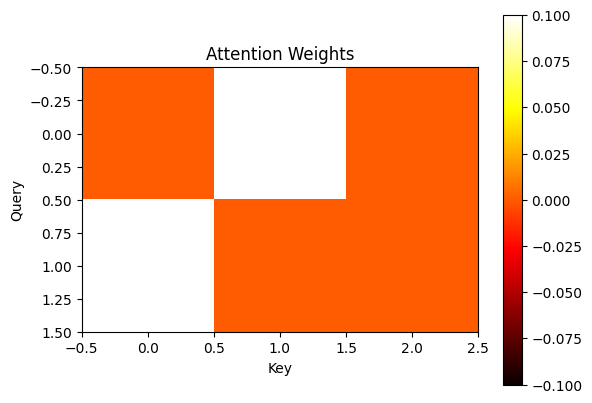

.
FAIL: test_self_attention (__main__.TestSelfAttention)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-2-ffae107ac2c9>", line 27, in test_self_attention
    np.testing.assert_almost_equal(output, expected_output)
  File "/usr/lib/python3.10/contextlib.py", line 79, in inner
    return func(*args, **kwds)
  File "/usr/local/lib/python3.10/dist-packages/numpy/testing/_private/utils.py", line 521, in assert_almost_equal
    return assert_array_almost_equal(actual, desired, decimal, err_msg)
  File "/usr/lib/python3.10/contextlib.py", line 79, in inner
    return func(*args, **kwds)
  File "/usr/local/lib/python3.10/dist-packages/numpy/testing/_private/utils.py", line 1034, in assert_array_almost_equal
    assert_array_compare(compare, x, y, err_msg=err_msg, verbose=verbose,
  File "/usr/lib/python3.10/contextlib.py", line 79, in inner
    return func(*args, **kwds)
  File "/usr/local/lib/python3.10/dist-pac

In [ ]:
import unittest
import numpy as np
import matplotlib.pyplot as plt

def self_attention(query, key, value, mask=None):
    scores = np.dot(query, key.T)
    if mask is not None:
        scores = scores + mask * -1e9
    attention_weights = np.exp(scores) / np.sum(np.exp(scores), axis=-1, keepdims=True)
    output = np.dot(attention_weights, value)
    return output, attention_weights

class TestSelfAttention(unittest.TestCase):
    def test_self_attention(self):
        query = np.array([[1, 0, 0], [0, 1, 0]])
        key = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
        value = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
        mask = np.array([[0, -1e9, 0], [-1e9, 0, 0]])

        output, attention_weights = self_attention(query, key, value, mask)

        # Define expected output and attention weights
        expected_output = np.array([[1, 0, 0], [0, 1, 0]])
        expected_attention_weights = np.array([[0.5, 0.5, 0], [0, 1, 0]])

        # Assert output and attention weights
        np.testing.assert_almost_equal(output, expected_output)
        np.testing.assert_almost_equal(attention_weights, expected_attention_weights)

    def test_visualize_attention_weights(self):
        query = np.array([[1, 0, 0], [0, 1, 0]])
        key = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
        value = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
        mask = np.array([[0, -1e9, 0], [-1e9, 0, 0]])

        _, attention_weights = self_attention(query, key, value, mask)

        # Visualize attention weights
        plt.imshow(attention_weights, cmap='hot', interpolation='nearest')
        plt.xlabel('Key')
        plt.ylabel('Query')
        plt.title('Attention Weights')
        plt.colorbar()
        plt.show()

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)


# Causal Language Modeling


However in self-supervised learning, LLMs employ the causal language modeling objective to acquire knowledge from any textual data without the explicit need for human-provided labels. Why is it called “causal”? Because the prediction at each step depends only on earlier steps in the sequence and not on future steps.

This process involves feeding a segment of the document to the model and asking it to predict the next word.

During the pre-training process, the network acquires substantial knowledge about language and grammar. We can then fine-tune the pre-trained model using a supervised approach for different tasks or a specific domain.

In contrast to other objectives like masked language modeling, where masked tokens are introduced in the input, the causal language modeling approach constructs sentences one word at a time. This key difference ensures that our model's performance is not adversely affected when dealing with real-world passages lacking masking tokens.

# MinGPT

https://github.com/karpathy/minGPT

#Decoding Methods
**1. Greedy Search**

Selects the token with the highest probability at each step.
Simplest method but can lead to repetitive or less optimal responses.

**2. Sampling**

Introduces randomness by selecting the next word based on its probability distribution.
Allows for more diverse output but can result in less coherent text.

**3. Beam Search**

Selects the top N candidate subsequent tokens with the highest probabilities at each step.
Reduces search space and produces more consistent results but can be slower and suboptimal.

**4. Top-K Sampling**

Narrows down the sampling pool to the top K most probable words.
Provides a balance between diversity and relevance.

**5. Top-p (Nucleus) Sampling**

Selects words from the smallest set of tokens whose cumulative probability exceeds a threshold P.
Offers fine-grained control over diversity and avoids rare or low-probability tokens.


#Parameters That Influence Text Generation
**1. Temperature**

Influences the randomness or determinism of generated text.
Low value makes output more focused, high value increases randomness.

**2. Stop Sequences**

Specific character sequences that halt text generation once they appear.
Guides length and structure of generated text.

**3. Frequency and Presence Penalties**

Used to discourage or encourage repetition of certain words.
Frequency penalty reduces likelihood of repeating frequently appeared tokens.
Presence penalty discourages repeating any token that has already appeared.


#Few-Shot Prompting:
In few-shot prompting, the model is provided with a few examples (prompts) along with the desired output for each example. These examples serve as a form of guidance or conditioning for the model, allowing it to generalize to similar tasks or prompts that it has not seen during training.

For example, consider the task of language translation. In few-shot prompting, you might provide the model with a few pairs of sentences in different languages along with their translations. The model uses these examples to learn the mapping between the two languages and can then translate new sentences it hasn't seen before.

**Few-Shot Prompting Example**:

      Prompt: "Translate the following sentences into French:

      Hello, how are you?
      What is your name?
      Where are you from?"
      Output:

      Bonjour, comment vas-tu?
      Quel est ton nom?
      D'où viens-tu?

In this example, the model was provided with a few examples of English sentences along with their French translations. It uses this information to translate new sentences into French.

#Zero-Shot Prompting:
In zero-shot prompting, the model is expected to perform a task or generate output for a prompt it has never seen before, without any specific examples or training on that particular task. The model is expected to generalize its knowledge from the training data to perform the new task based on the prompt alone.

Continuing with the language translation example, in zero-shot prompting, you might provide the model with a prompt in one language and ask it to translate it into another language, even if it hasn't seen that specific prompt during training. The model uses its understanding of language and translation learned from the training data to generate the translation.


**Zero-Shot Prompting Example:**

    Prompt: "Translate the sentence 'I love to travel' into German."

    Output: "Ich liebe es zu reisen."

In this example, the model was asked to translate a sentence into German without any specific examples of English-German translations. It generalizes its knowledge of language and translation to perform the task based on the prompt alone.


#Chain of Thoughts Prompting:
This technique involves breaking down complex problems into a series of simpler steps or thoughts.

It's like having a conversation with oneself to reach a conclusion. Each thought or step is a link in the chain that leads to the final answer.

**Example: Let's say you're trying to plan a trip to a new city.**

    Thought 1: "I need to decide on the dates of my trip."
    Thought 2: "I should check my work schedule and see when I can take time off."
    Thought 3: "I also need to consider the
    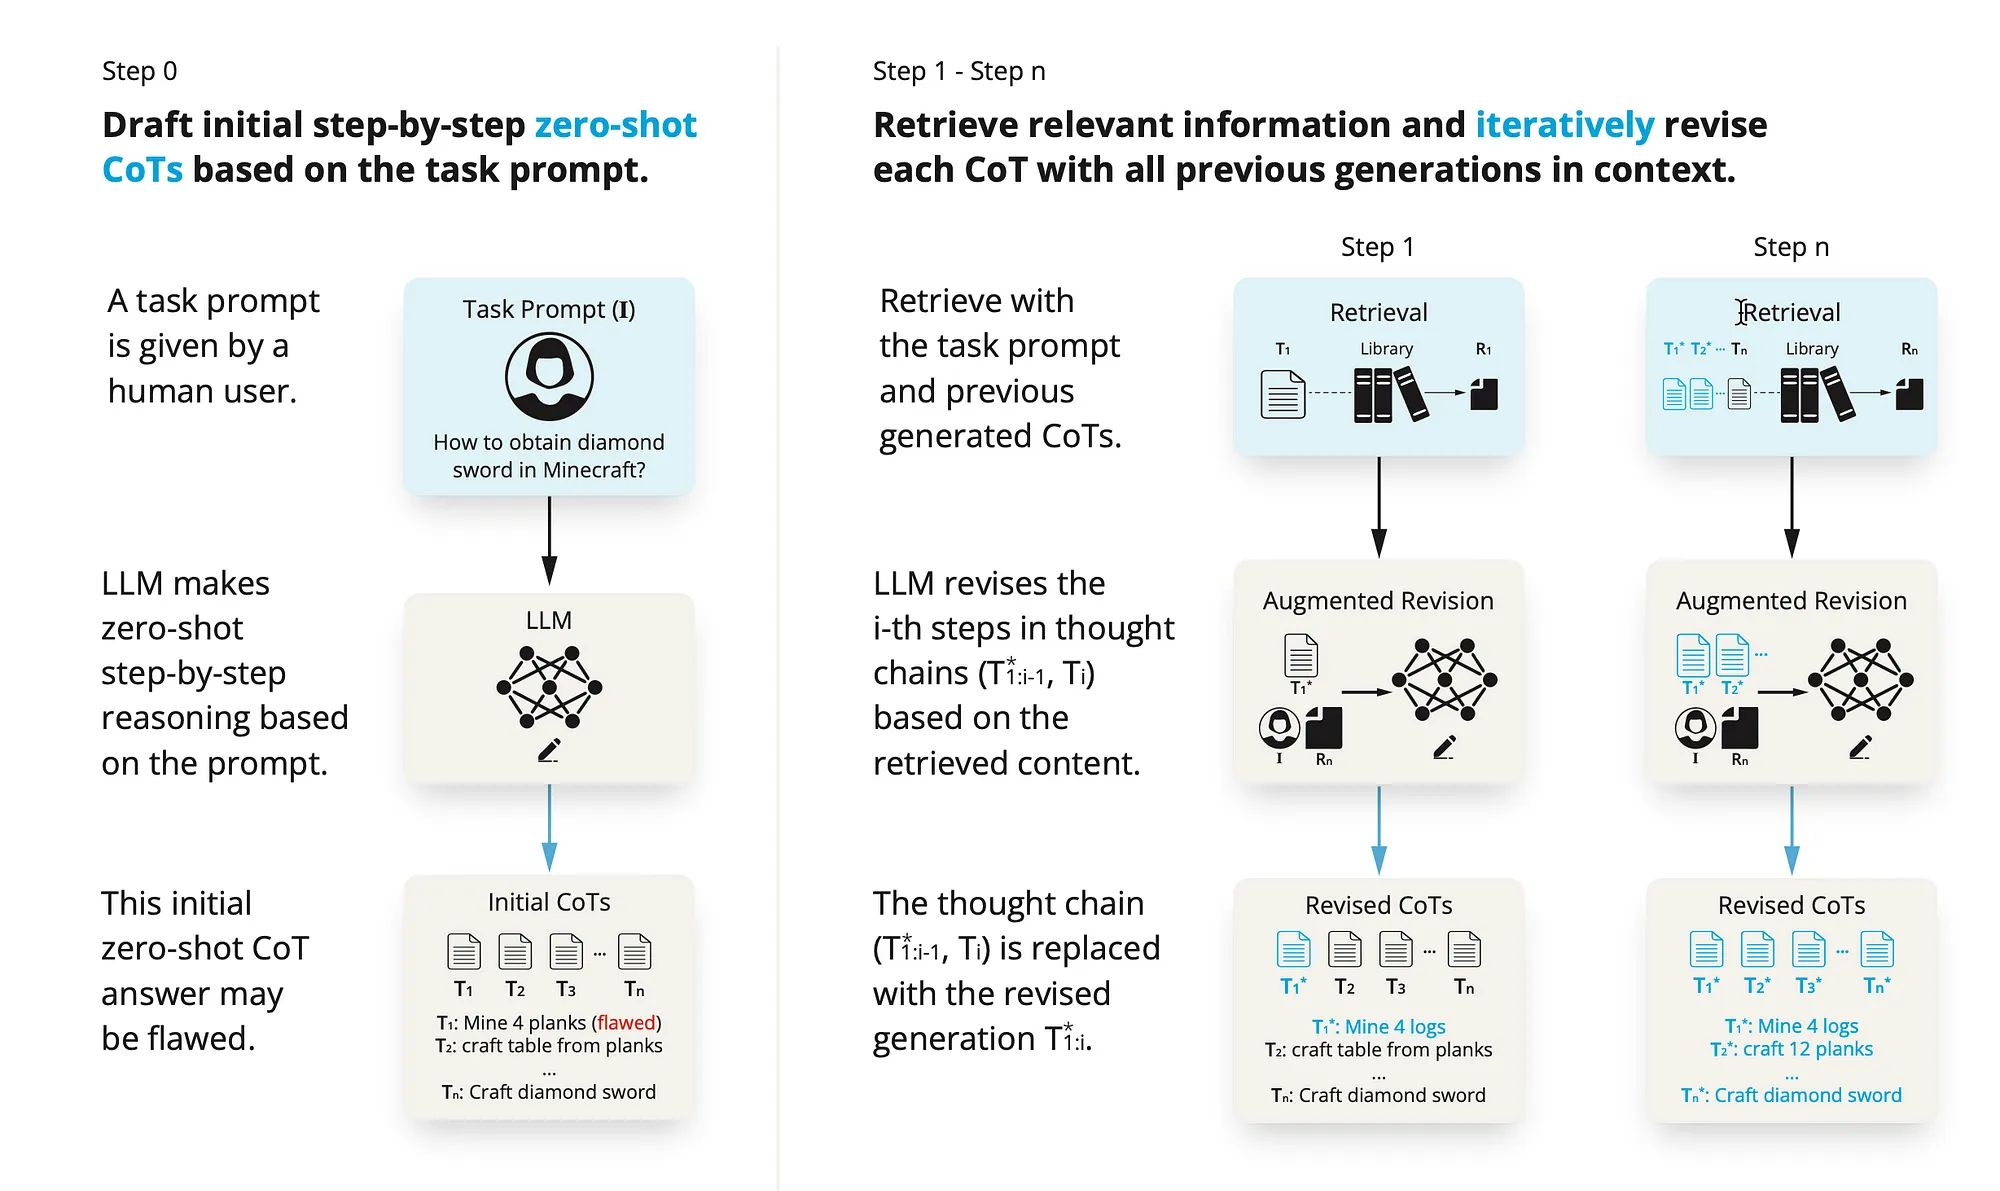weather in the city I'm visiting. I don't want to go when it's too hot or too cold."
    Thought 4: "Once I have the dates, I can start looking at flight prices and accommodations."
    Thought 5: "I should also research attractions and activities in the city to plan my itinerary."


Each of these thoughts prompts the next one, creating a chain that leads to a complete plan for your trip.

#Self Consistency Prompting:
This technique involves ensuring that your thoughts, beliefs, and actions align with each other. It's about maintaining consistency in your words and deeds, and in your internal and external expressions.

**Example: Let's say you believe in the importance of recycling for environmental conservation.**

    Thought 1: "I believe in recycling to protect the environment."
    Action 1: You separate your waste into recyclables and non-recyclables at home.
    Thought 2: "I should also encourage others to recycle."
    Action 2: You start a recycling initiative at your workplace and educate your colleagues about its importance.


In this case, your thoughts and actions are consistent with your belief in recycling. This self-consistency helps to reinforce your belief and make it a part of your behavior.

#In-context learning

In-context learning refers to a technique used to fine-tune or adapt a pre-trained language model to a specific task or domain by providing it with additional examples or context. This process allows the model to specialize and improve its performance on the target task without the need for extensive retraining from scratch.

In-context learning typically involves the following steps:

**Initialization**: Start with a pre-trained language model that has been trained on a large corpus of text data, such as OpenAI's GPT-3 or BERT.

**Fine-tuning**: Provide the model with examples or prompts related to the target task or domain. The model then adjusts its parameters to better fit these examples, while still retaining the knowledge learned during pre-training.

**Adaptation**: As the model is exposed to more examples and context related to the target task, it continues to refine its parameters to improve its performance on that task.

**Evaluation**: Periodically evaluate the model's performance on a separate validation set to ensure that it is learning the task effectively and not overfitting to the training examples.

In-context learning is particularly useful in scenarios where the target task or domain is different from the original pre-training data. By providing the model with relevant examples and context, it can quickly adapt to new tasks or domains with relatively little additional training data.

**Few-Shot Learning**: The LLMs are able to learn from the examples given to them, allowing them to handle more complicated tasks without the need for training or fine-tuning. This method is significantly less expensive than other options, as it only requires the cost of adding examples to each prompt. If your task can be solved just with few-shot learning, then it’s always the most efficient approach.

**Fine-Tuning**: If few-shot learning is not effective for your task, an alternative method is fine-tuning. This involves using some data points to create a task-specific model. Although finetuning can be challenging when acquiring new knowledge, it is more effective in adapting to different styles, and tones, or incorporating new vocabulary.

**Training From Scratch**: If fine-tuning is not effective, consider training a model from scratch with domain-specific data. However, this requires significant resources, such as cost, dataset availability, and expertise.

In [ ]:
from transformers import AutoConfig

config = AutoConfig.from_pretrained("gpt2")
print(config)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

GPT2Config {
  "_name_or_path": "gpt2",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
  },
  "transformers_version": "4.38.2",
  "use_cache": true,
  "vocab_size": 50257
}



In [ ]:
from transformers import GPT2LMHeadModel

model = GPT2LMHeadModel(config)
model_size = sum(t.numel() for t in model.parameters())
print(f"GPT-2 size: {model_size/1e6:.1f}M parameters")

GPT-2 size: 124.4M parameters


In [ ]:
config.n_layer = 32
config.n_embd = 1600
config.n_positions = 512
config.n_ctx = 512
config.n_head = 32

In [ ]:
model_1b = GPT2LMHeadModel(config)

model_size = sum(t.numel() for t in model_1b.parameters())
print(f"GPT2-1B size: {model_size/1e6:.1f}M parameters")

GPT2-1B size: 1064.9M parameters


#Evaluation metrics for LLM performance

**Perplexity**: Language modeling, text generation, machine translation, speech recognition. Lower is better.

**HumanEval**: Evaluating coding and problem-solving capabilities.

**HellaSwa**: Assessing performance on subjective and open-ended questions, natural language interaction.

**ARC**: Evaluating reasoning capabilities, multi-step reasoning, combining information, drawing inferences.

**MMLU**: Comprehensive evaluation across various tasks, including natural language understanding, generation, and reasoning.

**TruthfulQA**: Assessing truthfulness and factual accuracy of responses.

# Domain Specific Models

**FinBERT:**
1. Pre-trained using standard BERT technique on a massive financial data corpus
2. Ideal for financial document analysis, sentiment analysis, equity research, risk modeling
3. Speciality lies in unsurpassed understanding of financial terminology, jargon and context

**FinGPT:**
1. Pre-trained using GPT-style causal language modeling on structured/unstructured financial data, fine-tuned with RLHF
2. Ideal for financial report generation, summarization, providing explainable investment decisions
3. Speciality is generating human-like, yet factually accurate financial analyses  

**FinXLNet:**
1. Pre-trained using XLNet technique on alternative unstructured finance data sources, with prompt tuning
2. Ideal for alpha signal generation, sentiment tracking, industry trend analysis
3. Speciality is augmenting traditional data with unstructured insights for a competitive edge

**BioGPT:**
1. GPT-3 model adapted using instruct tuning on biomedical literature
2. Ideal for biomedical research, drug discovery, cohort analysis, clinical decision support
3. Speciality is mastery of medical terminology, biological processes and latest research frontiers

**MedScribe:**
1. Pre-trained from scratch using multimodal approach on healthcare text, images, speech
2. Ideal for medical transcription, radiology reporting, analyzing doctor-patient interactions  
3. Speciality is highly accurate multimodal understanding for healthcare applications

**ClinicalTransformer:**
1. Pre-trained using standard Transformer LM on patient data, guidelines, drug databases with prompt-based fine-tuning
2. Ideal for precision medicine, predictive diagnostics, patient risk stratification
3. Speciality is integrating multi-source patient data for personalized healthcare

**CodeGPT:**
1. GPT-3 adapted using CodeAlpaca-style supervised fine-tuning on open source codebases
2. Ideal for code generation, refactoring, documentation, pair programming assistance
3. Speciality is deep understanding of coding patterns, libraries and developer context  

**TechnoGPT:**
1. BERT pre-trained model further fine-tuned using Adopters technique on tech publications, manuals etc.
2. Ideal for technology research, innovation scouting, prior art search, prototyping  
3. Speciality is bridging cutting-edge research with practical tech applications

**SourceryAI:**  
1. Pre-trained using CodeBERT technique on code and developer communication data, with mixture-of-experts fine-tuning
2. Ideal for code understanding, vulnerability detection, code migration, AI code review
3. Speciality is capturing full context around code to enhance developer productivity

#Pre-training and fine-tuning method:

#Pre-training Methods:

**1. Standard Language Model Pre-training (e.g. GPT, BERT, RoBERTa, T5):**
   - Use for general language understanding and generation tasks
   - Suitable for a wide range of downstream NLP tasks

**2. Multimodal Pre-training (e.g. CLIP, SimVLM, Flamingo):**
   - Use when dealing with multi-modal data like text, images, audio
   - Ideal for multimedia applications, multimodal interaction, medical imaging

**3. Code Pre-training (e.g. CodeBERT, CodeGPT, PLBART):**
   - Use for code understanding, generation, and analysis tasks
   - Tailored for software development, code review, refactoring

**4. Domain-Specific Pre-training (e.g. FinBERT, BioMedBERT, LegalBERT):**
   - Pre-train on domain-specific corpora like finance, healthcare, legal
   - Improves performance on domain-specific downstream tasks

#Fine-tuning Methods:

**1. Supervised Fine-tuning:**
   - Use when you have labeled task-specific data
   - Adapts pre-trained model to a particular downstream task

**2. Reinforcement Learning from Human Feedback (RLHF) (e.g. InstructGPT, Claude):**
   - Use to make model outputs more coherent, truthful, and aligned
   - Helps in open-ended generation while maintaining control

**3. Prompt-Based Fine-tuning (e.g. PaLM, GPT-3):**
   - Use when you have limited task data but can provide prompts
   - Efficient adaptation without full model fine-tuning

**4. Adopters (e.g. FLAN models):**
   - Use to rapidly adapt a pre-trained model to new domains/tasks
   - Combines pre-trained model with trainable domain adapters

**5. Instruct Tuning (e.g. InstructGPT models):**
   - Use to make pre-trained models better at following instructions
   - Improves performance on instruction-following tasks

**6. Mixture-of-Experts (e.g. MT-NLG, PALM):**
   - Use to combine multiple expert models for different sub-tasks
   - Enables more specialized and efficient modeling

**7. Multi-Task Fine-tuning (e.g. MultiTask from AllenNLP):**
   - Fine-tune on multiple related tasks simultaneously
   - Improves transfer learning and generalization

#Full Fine-tuning: Teacher-Student Architecture

Full fine-tuning refers to the traditional approach of fine-tuning a pre-trained language model on a specific task by updating all its parameters.

In the teacher-student architecture, a smaller student model is trained to mimic the behavior of a larger teacher model. The teacher model is first fine-tuned on the target task, and then the student model is trained to produce similar outputs as the teacher, using techniques like knowledge distillation.

**Fine-Tune technique :** The teacher model is a larger pre-trained model that is fine-tuned on the target task. The student model is a smaller, more efficient model that is trained to mimic the teacher's outputs using distillation techniques.

**Use case** : Full fine-tuning is useful when you have a large amount of task-specific data and computational resources. The teacher-student approach is beneficial when you need to deploy a smaller, more efficient model while retaining the performance of a larger model.

**Popular models:** GPT-3, BERT, RoBERTa, and other large pre-trained models are often used as teacher models, while smaller variants like DistilBERT, TinyBERT, and MobileBERT are used as student models.

#Adaptor Tuning: Single, Parallel, and Scaled Parallel

Adaptor tuning is a lightweight fine-tuning approach that introduces trainable adaptor modules to a pre-trained model, instead of updating all its parameters.

**Working:** Adaptor modules are small neural networks that are inserted into the pre-trained model's layers. During fine-tuning, only the adaptor modules are updated, while the pre-trained model's parameters remain frozen.

**Architecture:** There are three main architectures: Single (one adaptor module per layer), Parallel (multiple adaptor modules per layer), and Scaled Parallel (multiple adaptor modules with different sizes per layer).

**Use Case:** Adaptor tuning is beneficial when you have limited task-specific data, as it requires updating fewer parameters than full fine-tuning. It is also useful for quickly adapting a pre-trained model to multiple tasks or domains.

**Popular models:** BERT, RoBERTa, GPT-2, and other pre-trained models have been adapted using adaptor tuning for various tasks.

#Prefix Tuning

Prefix tuning is a method that introduces learnable prefix tokens to a pre-trained language model, instead of updating its parameters.

**Working:** A small number of prefix tokens are prepended to the input sequence and optimized during fine-tuning. The pre-trained model remains frozen, and the prefix tokens act as a conditioning mechanism to adapt the model's behavior.

**Architecture:** The pre-trained model remains unchanged, and a set of learnable prefix tokens is introduced before the input sequence.

**Use Case:** Prefix tuning is useful when you have limited task-specific data or when you want to rapidly adapt a pre-trained model to multiple tasks or domains without updating its parameters.

**Popular models:** GPT-2, GPT-3, T5, and other large language models have been adapted using prefix tuning for various tasks.

#PEFT (Parameter-Efficient Fine-Tuning): LoRA (Low-Rank Adaptation)

PEFT is a family of techniques that introduce trainable low-rank matrices or tensors to a pre-trained model, instead of updating all its parameters.

**Working:** LoRA, short for Low-Rank Adaptation, is a specific PEFT method that introduces low-rank matrices to the pre-trained model's layers. During fine-tuning, only these low-rank matrices are updated, while the pre-trained model's parameters remain frozen.

**Architecture:** The pre-trained model remains unchanged, and trainable low-rank matrices or tensors are introduced at specific layers.

**Use Case:** PEFT and LoRA are beneficial when you have limited task-specific data or computational resources, as they require updating fewer parameters than full fine-tuning.

**Popular models:** LoRA has been applied to BERT, GPT-2, GPT-3, and other pre-trained models for various tasks.

#Instruction Tuning

Instruction tuning is a technique that fine-tunes a pre-trained language model to better follow instructions or prompts for a specific task.

**Working :** The pre-trained model is fine-tuned on a dataset of instructions and corresponding outputs for the target task. This teaches the model to understand and follow instructions more effectively.

**Architecture:** The pre-trained model remains unchanged, and fine-tuning is performed using a dataset of instructions and expected outputs.

**Use Case:** Instruction tuning is useful when you want to adapt a pre-trained model to follow instructions more accurately for tasks like question answering, task completion, or few-shot learning.

**Popular models:** InstructGPT, GPT-3, PaLM, and other large language models have been instruction-tuned for various tasks.

#RLHF (Reinforcement Learning from Human Feedback)

RLHF is a technique that fine-tunes a pre-trained language model using human feedback and reinforcement learning, to improve the quality and alignment of its outputs.

**Working:** The pre-trained model generates outputs, which are then rated or scored by human annotators. These scores are used as rewards in a reinforcement learning setup to fine-tune the model to produce better outputs.

**Architecture:** The pre-trained model remains unchanged, and fine-tuning is performed using a reinforcement learning algorithm and human feedback scores.

**Use Case:** RLHF is useful when you want to improve the coherence, truthfulness, and alignment of a pre-trained model's outputs, especially for open-ended generation tasks.

**Popular models:** InstructGPT, Claude (Anthropic), and other language models have been fine-tuned using RLHF for improved output quality and alignment.

# Tools,Frameworks,Platform

**I. Affordable GPU Compute:**

Vast.ai - Provides managed GPU instances and spot instances at lower costs.

**II. Safe and Ethical LLM Development:**
1. Anthropic's Constitutional AI - Enables training safe, reliable, and truthful LLMs.

**III. Vector Databases and Semantic Search:**
1. Pinecone - Industry-leading vector database for efficient similarity search.
2. Weaviate - Open-source vector search engine and database.

**IV. Question Answering (QA) Systems:**
1. Haystack - Comprehensive open-source framework for building QA systems.
2. LangChain - Flexible framework for building LLM applications, including QA.

**V. End-to-End LLM Platforms:**
1. Hugging Face - Most popular open-source platform for LLM development and deployment.
2. AWS SageMaker - Robust cloud platform for LLM training, tuning, and scalable inference.
3. Comet.ml - Experiment management and model tracking platform.

**VI. LLM Deployment and Hosting:**
1. Replicate - Platform for deploying, sharing, and scaling LLM models.

**VII. Experiment Tracking and Collaboration:**
1. Weights & Biases - Widely used for tracking experiments, metrics, and collaborative work.

In terms of cost, Vast.ai and open-source tools like Weaviate, Haystack, and LangChain are likely to be more cost-effective options, especially for smaller teams or individual developers.

Platforms like Hugging Face, AWS SageMaker, and Replicate may have higher costs associated with their hosted services and enterprise features, but they offer more comprehensive and scalable solutions for larger organizations or production-level deployments.



In [ ]:
!pip install -q --upgrade openai python-dotenv

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()


True

#Reinforcement Learning from Human Feedback (RLHF)


**Training Process**

    1. Optional finetuning of the LLM by following instructions.
    2. Creation of RLHF dataset by generating text completions from instructions.
    3. Collecting human feedback by ranking completions based on various aspects.
    4. Training a reward model to assign scores to completions based on human feedback.
    5. Fine-tuning the LLM using reinforcement learning and the reward model to produce higher-scored completions.

**Comparison with SFT**


RLHF better for teaching "human alignment" aspects with large, high-quality datasets but more expensive and time-consuming.

RLHF's results sensitive to parameters and hyperparameters, prone to local optima, and divergent losses.

SFT simpler, especially with LoRA, but may lack effectiveness in complex alignment tasks.

#Alternatives to RLHF

**Direct Preference Optimization (DPO)::**
Directly optimizes LLM using binary cross-entropy loss without complex RL techniques or reward models.

Simplifies fine-tuning process by optimizing LLM on preference data directly.

Transforms RL loss into a loss over reference model, optimizing for human preferences.

**Reinforced Self-Training (ReST)**

Operates cyclically with 'Grow' and 'Improve' steps:

    1. 'Grow' step generates predictions to augment dataset.
    2. 'Improve' step ranks and filters dataset using a reward model, fine-tuning LLM.

Reduces computational load compared to RLHF and allows easy inspection of data quality.

**Reinforcement Learning from AI Feedback (RLAIF)**

Uses AI Feedback Model instead of human feedback for training AI assistant.

Creates dataset of ranked preferences automatically, training Reward Model for reinforcement learning.


**Conclusion**

RLHF offers significant benefits but is complex and resource-intensive. Alternatives like DPO, ReST, and RLAIF address some limitations of RLHF, providing simpler, more cost-effective, and scalable approaches for training LLMs.

# Eficient LLM Deployment

###Quantization:
Quantization involves reducing the precision of model parameters (weights and biases) and activations from 32-bit floating-point representation to lower bit-widths, such as 8-bit or even lower. This can significantly reduce the model size and computational requirements.

Different quantization methods include:

**Post-training quantization**: The pre-trained model is quantized after training, without any fine-tuning.

**Quantization-aware training**: The model is trained with simulated quantization during the training process, allowing it to adapt to the quantized representation.

**Mixed-precision quantization**: Different parts of the model are quantized to different bit-widths based on their sensitivity to quantization noise.

###Pruning:
Pruning involves removing redundant or less important weights and activations from the model.

There are various pruning techniques:

**Weight pruning**: Unstructured weight pruning removes individual weights based on their magnitude or importance scores, while structured pruning removes entire filters, channels, or blocks.

**Activation pruning**: This technique prunes unnecessary activations during inference, which can be particularly effective for Transformer-based LLMs.

**Iterative pruning**: The model is pruned and fine-tuned iteratively, with the pruning threshold gradually increasing.

###Knowledge Distillation:
Knowledge distillation is a model compression technique where a smaller student model is trained to mimic the behavior of a larger teacher model. This allows transferring the knowledge from the larger model to a more compact and efficient model.

###Low-rank Factorization:
This method involves approximating the weight matrices of the model using low-rank matrix factorization techniques, such as singular value decomposition (SVD). This can significantly reduce the number of parameters while maintaining reasonable accuracy.

###Architecture Search:
Neural architecture search (NAS) techniques can be used to automatically explore and discover compact and efficient model architectures tailored for specific tasks or deployment constraints.

###Efficient Attention Mechanisms:
For Transformer-based LLMs, developing more efficient attention mechanisms, such as sparse attention, reformer attention, or linformer attention, can significantly reduce the computational complexity and memory requirements.

###Model Parallelism and Sharding:
Techniques like model parallelism and sharding can distribute the model across multiple devices or processors, allowing for more efficient utilization of computational resources and memory.

###Tokenization and Subword Regularization:
Optimizing the tokenization and subword regularization strategies can lead to more compact and efficient representations of the input text, reducing the computational overhead for LLMs.

#Future of LLM research and deployment

**1. Multimodal LLMs**
   - Combining text, images, audio, video data
   - Models like CLIP, ALIGN, Flamingo, Kosmo-1
   - Challenges in aligning multimodal representations

**2. Scaling Laws for LLM Training**
   - Optimal scaling of model size and dataset size
   - Power law scaling of performance
   - Theoretical understanding of scaling properties

**3. Advanced Prompting Frameworks**
   - ReAct framework for open-ended task decomposition  
   - Prompting for multi-step reasoning and task composition
   - ChatGPT plugins and integrations

**4. Training on Generated Data**
   - Self-training, data augmentation using generation
   - Challenges like model collapse, compounding errors
   - Safe deployment, filtering, and curation strategies

**5. Expanding Context Window**
   - FlashAttention, Sparse Transformers
   - Algorithms like ALiBi for efficient long-range attention
   - Efficient scaling of context length

**6. Retrieval-Augmented LLMs**
   - Integrating external knowledge sources
   - Retrieval-augmented architectures like RAG, REALM
   - Open-domain question answering

**7. Federated and Privacy-Preserving LLMs**
   - Training across decentralized data sources  
   - Differential privacy, secure aggregation techniques
   - Deployments with stronger privacy guarantees

**8. LLM Compression and Hardware Acceleration**  
   - Quantization, pruning, knowledge distillation
   - Specialized hardware like TPUs, efficient inference
   - Enabling on-device deployment

**9. Compositional and Modular LLM Architectures**
   - Composing skills and capabilities
   - Modular task-specific experts or components  
   - Few-shot learning across diverse tasks

**10. Robustness and Safety of LLMs**
    - Adversarial attacks and defenses
    - Controlling for biases, toxicity, and harmful outputs
    - Transparency, interpretability, and auditing

**11. Efficient Pre-Training and Fine-Tuning**
    - Data/compute efficient pre-training objectives  
    - Prompt/soft prompt tuning, P-tuning
    - Continual learning, iterative refinement

**12. Grounded and Embodied LLMs**
    - Connecting language to perception and actions
    - Sim2real transfer, physical embodiment
    - Instruction following, grounded task completion



#AI Agent

# Large Multimodal



https://learn.activeloop.ai/